Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [2]:
#Import required libraries
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Mounted at /content/gdrive


In [4]:
#Unzipping the file 
!unzip gdrive/MyDrive/CNN_assignment.zip

Archive:  gdrive/MyDrive/CNN_assignment.zip
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010512.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010889.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024468.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024470.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024511.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024646.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024654.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024707.jpg  
  inflating: Skin ca

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [5]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path('Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [6]:
data_dir_train

PosixPath('Skin cancer ISIC The International Skin Imaging Collaboration/Train')

In [7]:
 data_dir_test

PosixPath('Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [8]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [9]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [10]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset= 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [11]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset= 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [12]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


In [13]:
#Validation dataset class names
val_ds.class_names

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

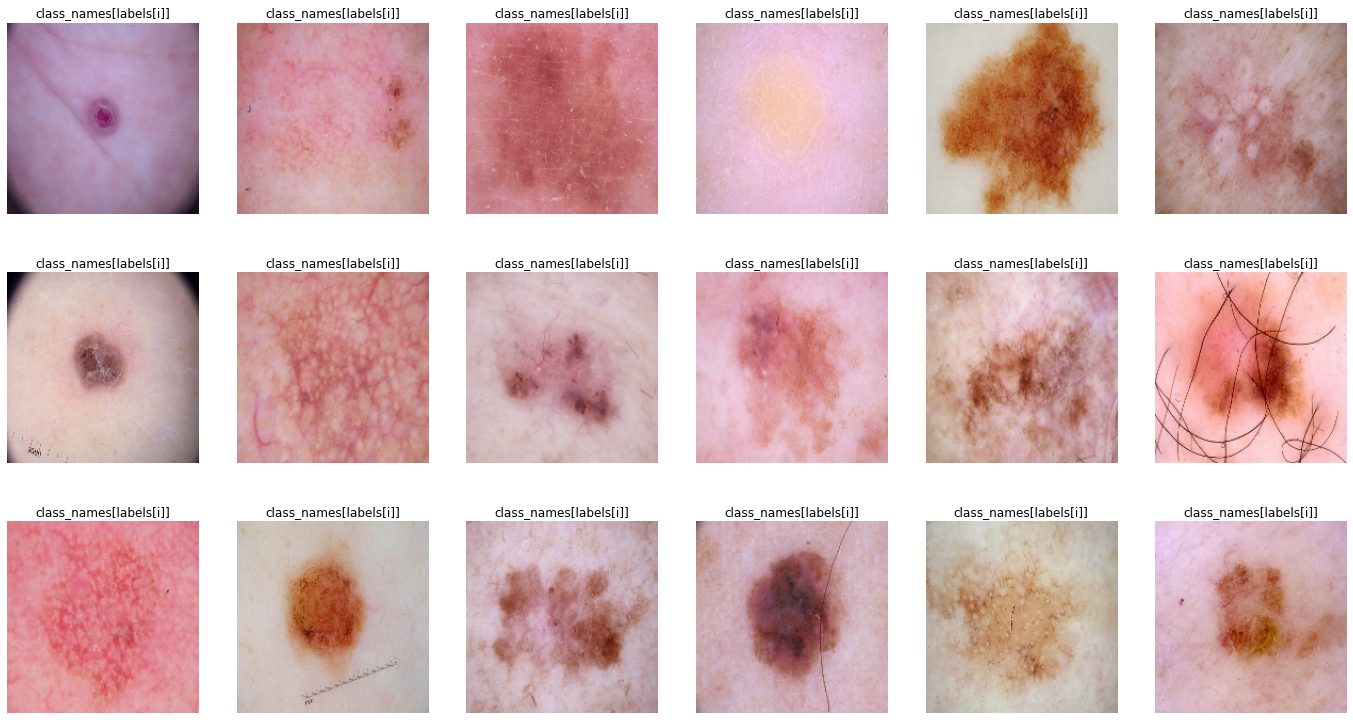

In [14]:
#Visualisation of all instances
import matplotlib.pyplot as plt
### your code goes here, you can use training or validation data to visualize
plt.figure(figsize=(24,13))
for images, labels in train_ds.take(1):
  for i in range(18):
    ax=plt.subplot(3,6,i+1)
    plt.imshow(images[i].numpy().astype('uint8'))
    plt.title("class_names[labels[i]]")
    plt.axis("off")


The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [15]:
#Optimisation
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [16]:
### Your code goes here
num_classes = 9
model = Sequential([
                        layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3)),
                        layers.Conv2D(16,3, padding='same', activation='relu'),
                        layers.MaxPool2D(),
                        layers.Conv2D(32,3,padding='same', activation='relu'),
                        layers.MaxPool2D(),
                        layers.Conv2D(64,3,padding='same', activation='relu'),
                        layers.MaxPool2D(),
                        layers.Flatten(),
                        layers.Dense(128, activation='relu'),
                        layers.Dense(num_classes)])




### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [17]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [18]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 64)        0

### Train the model

In [19]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 65s 964ms/step - loss: 1.9889 - accuracy: 0.2444 - val_loss: 1.7243 - val_accuracy: 0.4116
Epoch 2/20
56/56 [==============================] - 51s 915ms/step - loss: 1.5672 - accuracy: 0.4431 - val_loss: 1.4561 - val_accuracy: 0.5034
Epoch 3/20
56/56 [==============================] - 51s 916ms/step - loss: 1.4269 - accuracy: 0.4939 - val_loss: 1.3791 - val_accuracy: 0.5257
Epoch 4/20
56/56 [==============================] - 51s 916ms/step - loss: 1.3077 - accuracy: 0.5441 - val_loss: 1.3853 - val_accuracy: 0.5145
Epoch 5/20
56/56 [==============================] - 51s 915ms/step - loss: 1.2072 - accuracy: 0.5815 - val_loss: 1.4043 - val_accuracy: 0.5369
Epoch 6/20
56/56 [==============================] - 51s 916ms/step - loss: 1.1647 - accuracy: 0.5915 - val_loss: 1.4088 - val_accuracy: 0.5436
Epoch 7/20
56/56 [==============================] - 51s 914ms/step - loss: 1.1222 - accuracy: 0.5965 - val_loss: 1.4442 - val_accuracy: 0.5347

Inferences
From the above result , looking at accuracy and loss values we can say that model is overfitting as the error on the validation or test data is high

### Visualizing training results

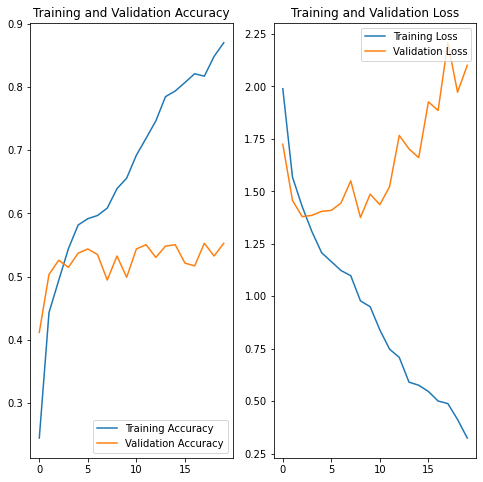

In [20]:
  acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here
Inferences From the above result , looking at accuracy and loss values we can say that model is overfitting as the error on the validation or test data is high

In [21]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here
data_aug = keras.Sequential(
    [
     layers.experimental.preprocessing.RandomFlip("horizontal", input_shape = (img_height, img_width,3)),
     layers.experimental.preprocessing.RandomRotation(0.1),
     layers.experimental.preprocessing.RandomZoom(0.1)
    ]
)


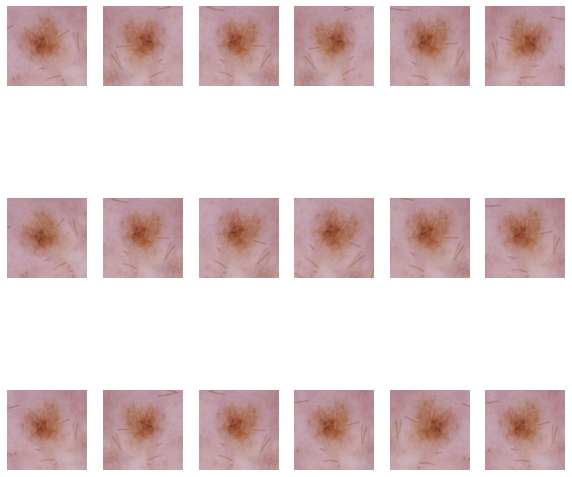

In [22]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here
plt.figure(figsize=(10,10))

for images, _ in train_ds.take(1):
  for i in range(18):
    aug_images = data_aug(images)
    ax=plt.subplot(3,6,i+1)
    plt.imshow(aug_images[0].numpy().astype('uint8'))
    plt.axis("off");


### Todo:
### Create the model, compile and train the model


In [23]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here

model = Sequential([
                        data_aug,   
                        layers.experimental.preprocessing.Rescaling(1./255),
                        layers.Conv2D(16,3, padding='same', activation='relu'),
                        layers.MaxPool2D(),
                        layers.Conv2D(32,3,padding='same', activation='relu'),
                        layers.MaxPool2D(),
                        layers.Conv2D(64,3,padding='same', activation='relu'),
                        layers.MaxPool2D(),
                        layers.Dropout(0.2),
                        layers.Flatten(),
                        layers.Dense(128, activation='relu'),
                        layers.Dense(num_classes)])



### Compiling the model

In [24]:
## Your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training the model

In [25]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)


Epoch 1/20
56/56 [==============================] - 60s 1s/step - loss: 2.0456 - accuracy: 0.2070 - val_loss: 1.9100 - val_accuracy: 0.3535
Epoch 2/20
56/56 [==============================] - 60s 1s/step - loss: 1.7150 - accuracy: 0.4107 - val_loss: 1.5322 - val_accuracy: 0.4586
Epoch 3/20
56/56 [==============================] - 60s 1s/step - loss: 1.5019 - accuracy: 0.4721 - val_loss: 1.6041 - val_accuracy: 0.4407
Epoch 4/20
56/56 [==============================] - 60s 1s/step - loss: 1.4503 - accuracy: 0.4972 - val_loss: 1.4660 - val_accuracy: 0.5078
Epoch 5/20
56/56 [==============================] - 60s 1s/step - loss: 1.3696 - accuracy: 0.5134 - val_loss: 1.4239 - val_accuracy: 0.5213
Epoch 6/20
56/56 [==============================] - 60s 1s/step - loss: 1.3271 - accuracy: 0.5218 - val_loss: 1.3601 - val_accuracy: 0.5280
Epoch 7/20
56/56 [==============================] - 60s 1s/step - loss: 1.3338 - accuracy: 0.5285 - val_loss: 1.4665 - val_accuracy: 0.4743
Epoch 8/20
56/56 [==

From the above accuracy values we can say that model is underfitting

### Visualizing the results

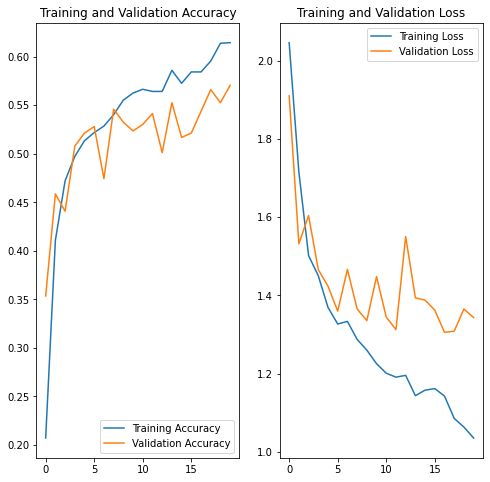

In [26]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Inferences from above graph
we can infer that it is not a good model , its underfitting as the model performs poorly on training data


#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?
Answer: Inferences from above graph we can infer that it is not a good model , its underfitting as the model performs poorly on training data

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [27]:
## Your code goes here.
from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train, "*", "*.jpg"))]
path_list

['Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/ISIC_0010240.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/ISIC_0010723.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/ISIC_0010349.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/ISIC_0000147.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/ISIC_0010878.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/ISIC_0010143.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/ISIC_0010608.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/ISIC_0011057.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/ISIC_0000162.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/ISIC_0000401.jpg',
 'Skin cancer ISIC T

In [28]:
#Creating target list
target_List = [os.path.basename(os.path.dirname(x)) for x in glob(os.path.join(data_dir_train, "*", "*.jpg")) ]
target_List

['melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',

In [29]:
#Finding the length of target list 
len(target_List)

2239

In [30]:
#Creating dataframe
dataframe_dict_orig = dict(zip(path_list,target_List))
dataframe_dict_orig

{'Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/ISIC_0010240.jpg': 'melanoma',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/ISIC_0010723.jpg': 'melanoma',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/ISIC_0010349.jpg': 'melanoma',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/ISIC_0000147.jpg': 'melanoma',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/ISIC_0010878.jpg': 'melanoma',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/ISIC_0010143.jpg': 'melanoma',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/ISIC_0010608.jpg': 'melanoma',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/ISIC_0011057.jpg': 'melanoma',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/ISIC_0000162.jpg': 'melanoma',
 'Skin can

In [31]:
orig_df = pd.DataFrame(list(dataframe_dict_orig.items()), columns= ['Path' , 'label'])
orig_df.shape

(2239, 2)

Using the above dataframe we convert 'Label' column to numbers using LabelEncoder

In [32]:
# Importing  required module to convert label to numbers
from sklearn.preprocessing import LabelEncoder

# Creating an object of the label encoder class
le = LabelEncoder()

# Apply labelencoder object on columns for the above dataframe
orig_df_encoded = orig_df.apply(le.fit_transform)


In [33]:
orig_df_encoded

,Path,label
0,809,3
1,915,3
2,829,3
3,592,3
4,958,3
...,...,...
2234,1883,6
2235,1863,6
2236,1848,6
2237,1894,6


In [34]:
#Finding the percentage
orig_df_encoded.value_counts(normalize=True)*100

Path  label
2238  8        0.044663
743   3        0.044663
749   3        0.044663
748   3        0.044663
747   3        0.044663
                 ...   
1498  5        0.044663
1499  5        0.044663
1500  5        0.044663
1501  5        0.044663
0     0        0.044663
Length: 2239, dtype: float64

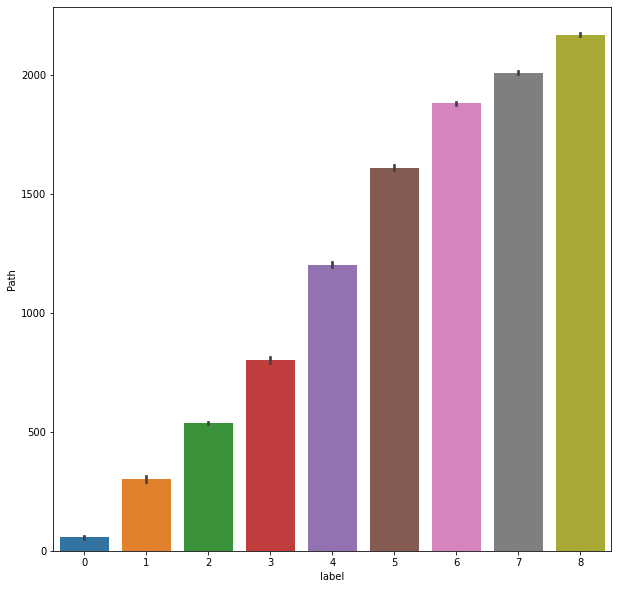

In [35]:
#Barplot 
import seaborn as sns
plt.figure(figsize=(10,10))
sns.barplot(data = orig_df_encoded , x='label', y='Path')
plt.show()



#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
Class 0 has least number of samples
#### - Which classes dominate the data in terms proportionate number of samples?
Class 8 


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [36]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [37]:
#Checking the values in class_names 
class_names

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

In [38]:
path_to_training_dataset="Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F8CCDC37DD0>:   0%|          | 1/500 [00:00<01:18,  6.32 Samples/s]

Initialised with 114 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F8CDA3ACB10>: 100%|██████████| 500/500 [00:19<00:00, 25.40 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 376 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F8CCE044250>: 100%|██████████| 500/500 [00:19<00:00, 25.44 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 95 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F8CDA3AB9D0>: 100%|██████████| 500/500 [00:19<00:00, 25.20 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 438 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=767x576 at 0x7F8CCC464150>: 100%|██████████| 500/500 [01:39<00:00,  5.01 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 357 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=767x576 at 0x7F8CCC4EA410>: 100%|██████████| 500/500 [01:30<00:00,  5.50 Samples/s]
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F8CCC508FD0>:   0%|          | 1/500 [00:00<00:50,  9.79 Samples/s]

Initialised with 462 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F8CCDA75B50>: 100%|██████████| 500/500 [00:19<00:00, 25.35 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 77 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7F8D1F9E6E90>: 100%|██████████| 500/500 [00:47<00:00, 10.49 Samples/s]
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F8CCC430FD0>:   0%|          | 1/500 [00:00<01:05,  7.66 Samples/s]

Initialised with 181 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F8CCA6E1F90>: 100%|██████████| 500/500 [00:19<00:00, 26.00 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 139 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F8CCDAEA1D0>: 100%|██████████| 500/500 [00:19<00:00, 25.14 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [39]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [40]:
path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list_new

['Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output/melanoma_original_ISIC_0001135.jpg_4a668594-8fd5-4400-868e-99a86691a7a3.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output/melanoma_original_ISIC_0010162.jpg_92c738e2-ed33-45b5-959a-014eca9c2c5b.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output/melanoma_original_ISIC_0010106.jpg_d0e19e9d-66f9-4a31-a18c-4b788980e7a9.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output/melanoma_original_ISIC_0010329.jpg_213e78c2-c5b1-45f4-b87e-43393d5ff3e5.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output/melanoma_original_ISIC_0000292.jpg_99746b48-edc6-4fc2-8e4a-d47c4fa64af3.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output/melanoma_original_ISIC_0010550.jpg_27744595-833b-42ff-9271-ad4198197a0b.jpg',
 'Skin cancer IS

In [41]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',

In [42]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [43]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = orig_df.append(df2)

In [44]:
new_df['Label'].value_counts()

dermatofibroma                500
seborrheic keratosis          500
actinic keratosis             500
basal cell carcinoma          500
vascular lesion               500
squamous cell carcinoma       500
pigmented benign keratosis    500
melanoma                      500
nevus                         500
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [45]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [46]:
#data_dir_train="path to directory with training data + data created using augmentor"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [47]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create your model (make sure to include normalization)

In [48]:
## your code goes here
num_classes = 9
model = Sequential([
                        layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3)),
                        layers.Conv2D(16,3, padding='same', activation='relu'),
                        layers.MaxPool2D(),
                        layers.Conv2D(32,3,padding='same', activation='relu'),
                        layers.MaxPool2D(),
                        layers.Conv2D(64,3,padding='same', activation='relu'),
                        layers.MaxPool2D(),
                        layers.Flatten(),
                        layers.Dense(128, activation='relu'),
                        layers.Dense(num_classes)])

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [49]:
## your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [50]:
epochs = 30
## Your code goes here, use 50 epochs.
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
169/169 [==============================] - 222s 1s/step - loss: 1.8091 - accuracy: 0.3221 - val_loss: 1.4523 - val_accuracy: 0.4483
Epoch 2/30
169/169 [==============================] - 222s 1s/step - loss: 1.3976 - accuracy: 0.4681 - val_loss: 1.3686 - val_accuracy: 0.4772
Epoch 3/30
169/169 [==============================] - 222s 1s/step - loss: 1.2076 - accuracy: 0.5462 - val_loss: 1.0626 - val_accuracy: 0.5942
Epoch 4/30
169/169 [==============================] - 221s 1s/step - loss: 1.0333 - accuracy: 0.6237 - val_loss: 1.0060 - val_accuracy: 0.6231
Epoch 5/30
169/169 [==============================] - 221s 1s/step - loss: 0.8916 - accuracy: 0.6701 - val_loss: 0.7547 - val_accuracy: 0.7342
Epoch 6/30
169/169 [==============================] - 221s 1s/step - loss: 0.7394 - accuracy: 0.7289 - val_loss: 0.6114 - val_accuracy: 0.7826
Epoch 7/30
169/169 [==============================] - 221s 1s/step - loss: 0.6446 - accuracy: 0.7730 - val_loss: 0.4493 - val_accuracy: 0.8531

#### **Todo:**  Visualize the model results

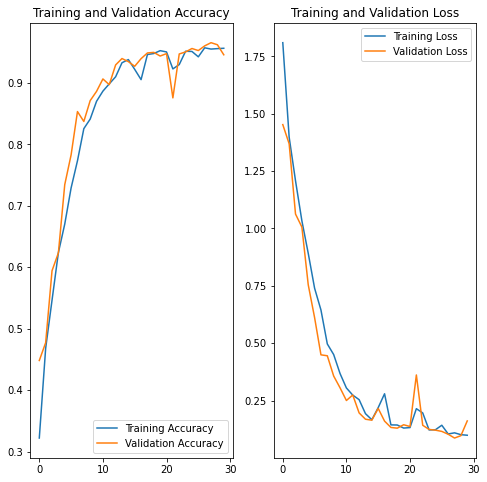

In [51]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



Yes from the above graph we can say that class rebalance helped in getting rid of overfitting and underfitting encountered.